<a href="https://colab.research.google.com/github/Abhijeet3407/Artifical-Inteligence/blob/main/Final_Project_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install Keras Tuner for hyperparameter tuning and SHAP for explainability
!pip install -q keras-tuner shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 4.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras_tuner as kt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
import shap

# Initialize JavaScript for SHAP plots
shap.initjs()

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

print("Libraries Imported. TensorFlow Version:", tf.__version__)

Libraries Imported. TensorFlow Version: 2.19.0


--- Loading Fashion MNIST Data ---
29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


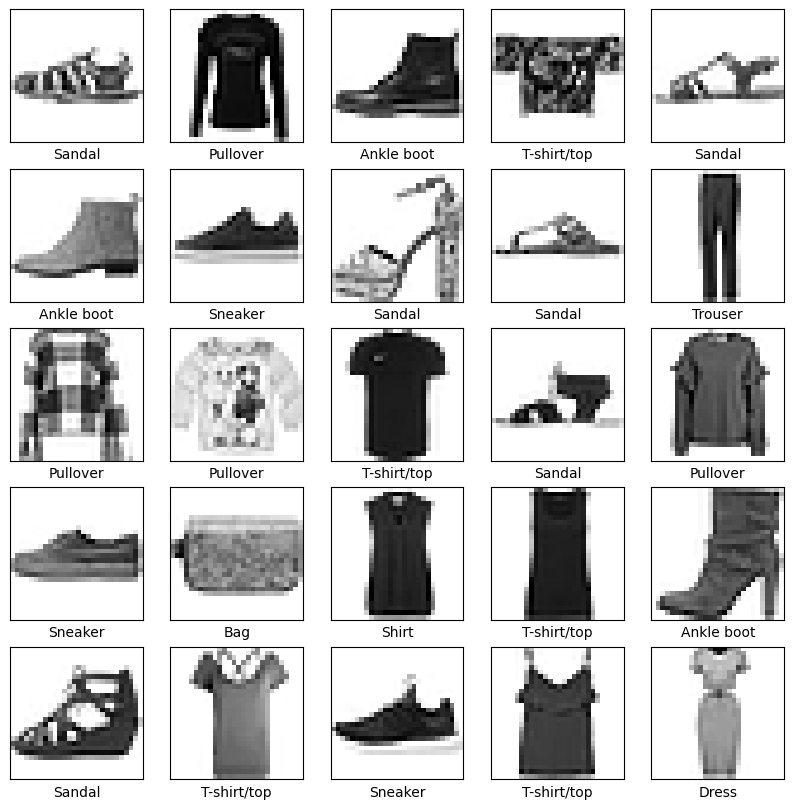

In [ ]:
# ==========================================
# PART 1: Fashion MNIST Classification
# ==========================================
print("--- Loading Fashion MNIST Data ---")

# 1. Data Loading
(x_train_full, y_train_full), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Validation split
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.1, random_state=42)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 2. Preprocessing
# Normalization
x_train = x_train.astype("float32") / 255.0
x_val = x_val.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# using different fileter for processing images
# using data augmentation

# Flatten for ML models (N, 784)
x_train_flat = x_train.reshape((-1, 784))
x_val_flat = x_val.reshape((-1, 784))
x_test_flat = x_test.reshape((-1, 784))

# Reshape for CNN (N, 28, 28, 1)
x_train_cnn = x_train.reshape((-1, 28, 28, 1))
x_val_cnn = x_val.reshape((-1, 28, 28, 1))
x_test_cnn = x_test.reshape((-1, 28, 28, 1))

# One-hot encoding
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_val_cat = keras.utils.to_categorical(y_val, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

# Visualize sample
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

# Define Evaluation Function
results_list = []

def evaluate_model(y_true, y_pred, model_name):
    acc = accuracy_score(y_true, y_pred)
    # Using 'weighted' average for multiclass
    prec = precision_score(y_true, y_pred, average='weighted')
    rec = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"\n--- {model_name} Metrics ---")
    print(f"Accuracy:  {acc:.4f}")
    print(f"F1 Score:  {f1:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=class_names))

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    return {'Model': model_name, 'Accuracy': acc, 'F1': f1, 'Precision': prec, 'Recall': rec}

--- Training Logistic Regression ---


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'mul

Logistic Regression 5-Fold CV Accuracy: 0.7935 (+/- 0.0069)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



--- Logistic Regression Metrics ---
Accuracy:  0.8359
F1 Score:  0.8351
Precision: 0.8347
Recall:    0.8359

Classification Report:
               precision    recall  f1-score   support

 T-shirt/top       0.79      0.80      0.80      1000
     Trouser       0.97      0.96      0.96      1000
    Pullover       0.72      0.72      0.72      1000
       Dress       0.82      0.85      0.84      1000
        Coat       0.73      0.75      0.74      1000
      Sandal       0.94      0.91      0.93      1000
       Shirt       0.61      0.56      0.59      1000
     Sneaker       0.89      0.94      0.92      1000
         Bag       0.93      0.93      0.93      1000
  Ankle boot       0.94      0.94      0.94      1000

    accuracy                           0.84     10000
   macro avg       0.83      0.84      0.84     10000
weighted avg       0.83      0.84      0.84     10000



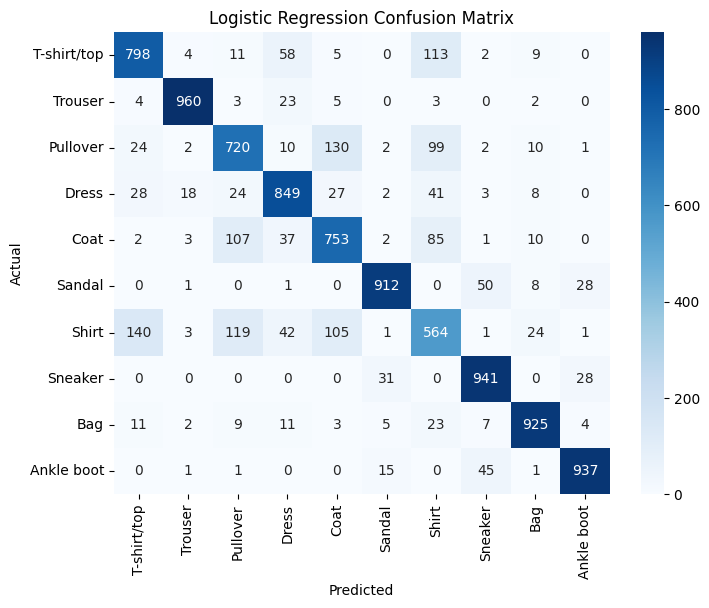

In [ ]:
print("--- Training Logistic Regression ---")

# Using Pipeline for Scaling + Model
lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200))
])

# Cross Validation (Using a subset to speed up execution in Colab)
# Use x_train_flat[:10000] for faster CV results
cv_scores = cross_val_score(lr_pipeline, x_train_flat[:10000], y_train[:10000], cv=5, scoring='accuracy')
print(f"Logistic Regression 5-Fold CV Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

# Full Training
lr_pipeline.fit(x_train_flat, y_train)

# Prediction
y_pred_lr = lr_pipeline.predict(x_test_flat)
results_list.append(evaluate_model(y_test, y_pred_lr, "Logistic Regression"))

Trial 30 Complete [00h 00m 53s]
val_accuracy: 0.8868333101272583

Best val_accuracy So Far: 0.8868333101272583
Total elapsed time: 00h 11m 30s
Best Hyperparameters: {'num_layers': 2, 'units_0': 128, 'dropout': False, 'learning_rate': 0.001, 'units_1': 256, 'units_2': 192, 'tuner/epochs': 10, 'tuner/initial_epoch': 0, 'tuner/bracket': 0, 'tuner/round': 0}
Epoch 1/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7753 - loss: 0.6319 - val_accuracy: 0.8573 - val_loss: 0.3974
Epoch 2/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8610 - loss: 0.3763 - val_accuracy: 0.8693 - val_loss: 0.3651
Epoch 3/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8752 - loss: 0.3327 - val_accuracy: 0.8780 - val_loss: 0.3462
Epoch 4/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8860 - loss: 0.3041 - val_accuracy: 0.8793 - val_loss: 0.3538
Epoch 5/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8928 - loss: 0.2852 - val_accuracy: 0.8833 - val_loss: 

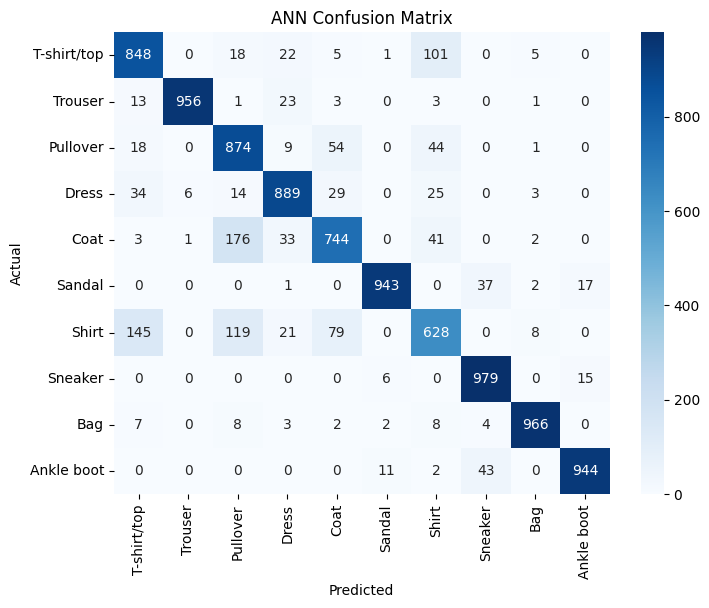

In [ ]:
print("--- Tuning & Training ANN ---")

def build_ann(hp):
    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28)))

    # Tune layers
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(layers.Dense(
            units=hp.Int(f'units_{i}', min_value=64, max_value=256, step=64),
            activation='relu'
        ))
        if hp.Boolean("dropout"):
            model.add(layers.Dropout(rate=0.25))

    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

tuner_ann = kt.Hyperband(
    build_ann,
    objective='val_accuracy',
    max_epochs=10,
    factor=3,
    directory='colab_kt_dir',
    project_name='ann_tuning'
)

stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

tuner_ann.search(x_train, y_train_cat, epochs=10, validation_data=(x_val, y_val_cat), callbacks=[stop_early], verbose=1)

# Train Best Model
best_hps_ann = tuner_ann.get_best_hyperparameters(num_trials=1)[0]
print(f"Best Hyperparameters: {best_hps_ann.values}")

ann_model = tuner_ann.hypermodel.build(best_hps_ann)
ann_model.fit(x_train, y_train_cat, epochs=15, validation_data=(x_val, y_val_cat), verbose=1)

# Evaluate
y_pred_ann_prob = ann_model.predict(x_test)
y_pred_ann = np.argmax(y_pred_ann_prob, axis=1)
results_list.append(evaluate_model(y_test, y_pred_ann, "ANN"))

Trial 2 Complete [00h 00m 33s]
val_accuracy: 0.9041666388511658

Best val_accuracy So Far: 0.9041666388511658
Total elapsed time: 00h 01m 10s
Epoch 1/15


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


844/844 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 0.5706 - loss: 1.1759 - val_accuracy: 0.8040 - val_loss: 0.5071
Epoch 2/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 36s 20ms/step - accuracy: 0.7374 - loss: 0.7025 - val_accuracy: 0.8313 - val_loss: 0.4686
Epoch 3/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step - accuracy: 0.7619 - loss: 0.6457 - val_accuracy: 0.8362 - val_loss: 0.4430
Epoch 4/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step - accuracy: 0.7730 - loss: 0.6167 - val_accuracy: 0.8305 - val_loss: 0.4438
Epoch 5/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.7830 - loss: 0.5895 - val_accuracy: 0.8407 - val_loss: 0.4311
Epoch 6/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step - accuracy: 0.7832 - loss: 0.5888 - val_accuracy: 0.8513 - val_loss: 0.4022
Epoch 7/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.7855 - loss: 0.5762 - val_accuracy: 0.8527 - val_loss: 0.4006
Epoch 8/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step - accuracy: 0.7869 - loss: 0.5700 - val_accurac

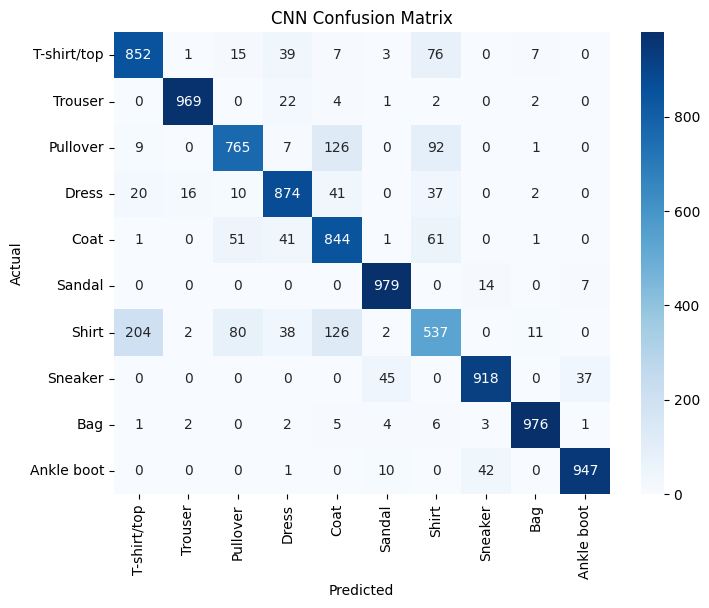

In [ ]:
print("--- Tuning & Training CNN ---")

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train_cnn)

def build_cnn(hp):
    model = keras.Sequential()
    model.add(layers.Input(shape=(28, 28, 1)))

    # Tune Conv blocks
    for i in range(hp.Int('conv_blocks', 1, 2)):
        model.add(layers.Conv2D(
            filters=hp.Int(f'filters_{i}', 32, 64, step=32),
            kernel_size=(3, 3),
            activation='relu',
            padding='same'
        ))
        model.add(layers.MaxPooling2D((2, 2)))
        model.add(layers.Dropout(0.25))

    model.add(layers.Flatten())
    model.add(layers.Dense(
        units=hp.Int('dense_units', 64, 128, step=64),
        activation='relu'
    ))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [1e-3, 1e-4])),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

tuner_cnn = kt.RandomSearch(
    build_cnn,
    objective='val_accuracy',
    max_trials=2, # Keep trials low for Colab speed
    executions_per_trial=1,
    directory='colab_kt_dir',
    project_name='cnn_tuning'
)

tuner_cnn.search(x_train_cnn, y_train_cat, epochs=5, validation_data=(x_val_cnn, y_val_cat), callbacks=[stop_early], verbose=1)

best_hps_cnn = tuner_cnn.get_best_hyperparameters()[0]
cnn_model = tuner_cnn.hypermodel.build(best_hps_cnn)

# Train with Augmentation
cnn_model.fit(
    datagen.flow(x_train_cnn, y_train_cat, batch_size=64),
    epochs=15,
    validation_data=(x_val_cnn, y_val_cat),
    verbose=1
)

# Evaluate
y_pred_cnn_prob = cnn_model.predict(x_test_cnn)
y_pred_cnn = np.argmax(y_pred_cnn_prob, axis=1)
results_list.append(evaluate_model(y_test, y_pred_cnn, "CNN"))


Final Model Comparison:
                 Model  Accuracy        F1  Precision  Recall
0  Logistic Regression    0.8359  0.835088   0.834673  0.8359
1                  ANN    0.8771  0.876562   0.879164  0.8771
2                  CNN    0.8661  0.864045   0.864797  0.8661


/tmp/ipython-input-1170464709.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='F1', data=df_results, palette='viridis')


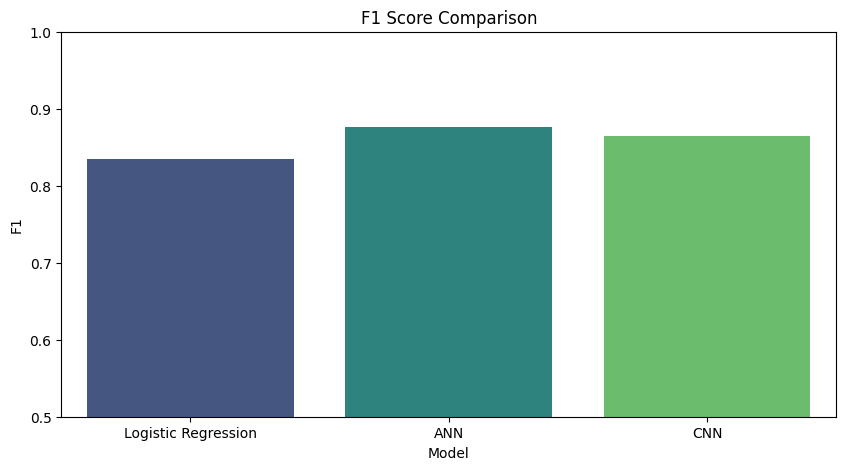

Generating SHAP Explanations...


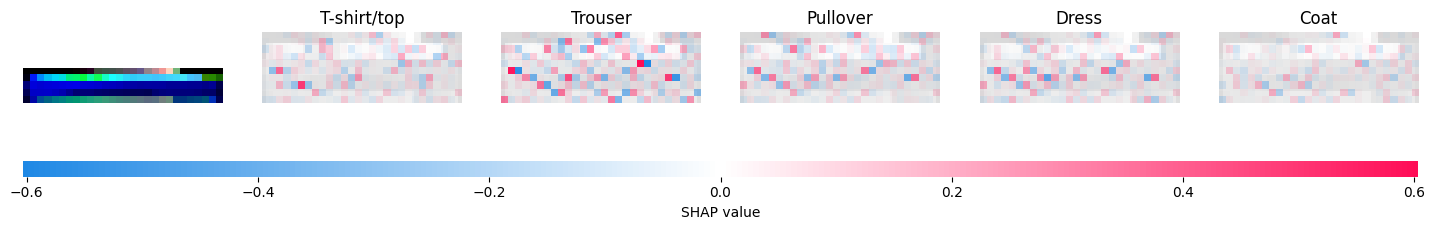

In [ ]:
# Comparison
df_results = pd.DataFrame(results_list)
print("\nFinal Model Comparison:")
print(df_results)

plt.figure(figsize=(10, 5))
sns.barplot(x='Model', y='F1', data=df_results, palette='viridis')
plt.title('F1 Score Comparison')
plt.ylim(0.5, 1.0)
plt.show()

# SHAP for Logistic Regression
print("Generating SHAP Explanations...")
# Use a background of 100 samples
background = x_train_flat[:100]
# Explain 5 test images
test_samples = x_test_flat[:5]

explainer = shap.LinearExplainer(lr_pipeline.named_steps['logreg'], background)
shap_values = explainer.shap_values(test_samples)

# Depending on sklearn version, shap_values might be a list or array
# Reshape for image plotting
reshaped_shap = []
if isinstance(shap_values, list):
    for c in shap_values:
         reshaped_shap.append(c.reshape(-1, 28, 28))
else:
    reshaped_shap = [v.reshape(-1, 28, 28) for v in shap_values] # Fallback

shap.image_plot(reshaped_shap, test_samples.reshape(-1, 28, 28), labels=class_names)

**Code with less Data accuracy**

Logistic Regression predictions for the first 5 test samples:
Sample 1: Predicted class ID = 9 (Label: Ankle boot)
Sample 2: Predicted class ID = 2 (Label: Pullover)
Sample 3: Predicted class ID = 1 (Label: Trouser)
Sample 4: Predicted class ID = 1 (Label: Trouser)
Sample 5: Predicted class ID = 6 (Label: Shirt)

Actual labels for these samples:
Sample 1: Actual class ID = 9 (Label: Ankle boot)


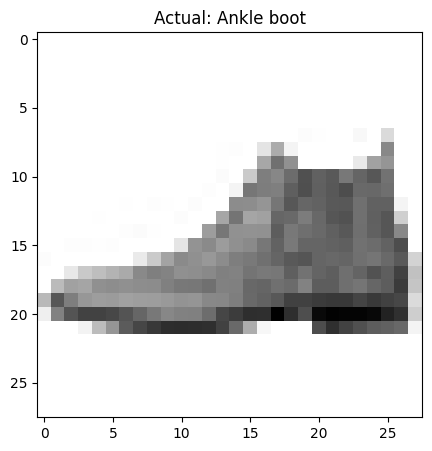

Sample 2: Actual class ID = 2 (Label: Pullover)


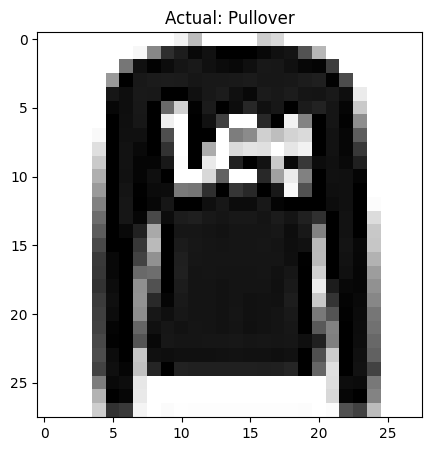

Sample 3: Actual class ID = 1 (Label: Trouser)


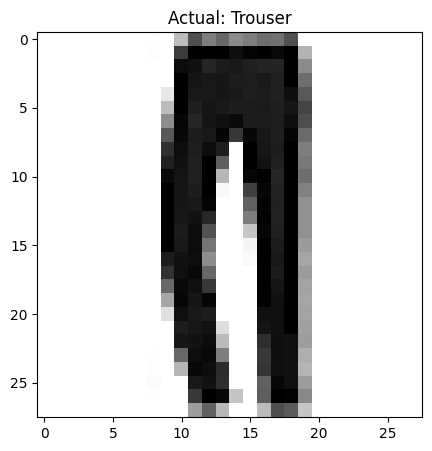

Sample 4: Actual class ID = 1 (Label: Trouser)


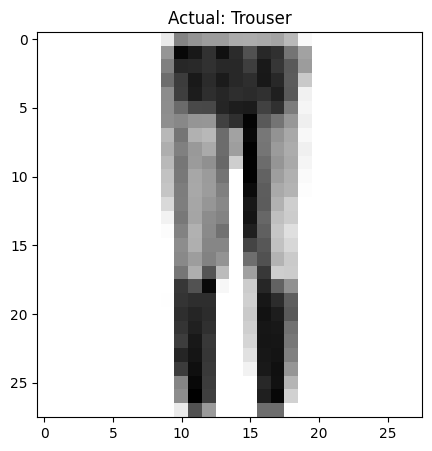

Sample 5: Actual class ID = 6 (Label: Shirt)


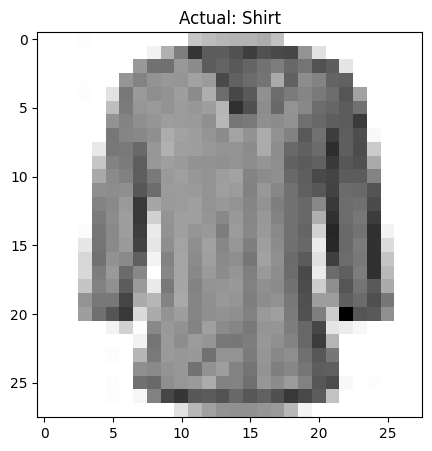

In [ ]:
def predict_with_lr_model(model_pipeline, X_new):
    """
    Makes predictions using the Logistic Regression pipeline.

    Args:
        model_pipeline: The trained sklearn Pipeline object (lr_pipeline).
        X_new: New input data (e.g., flattened image data) for prediction.

    Returns:
        numpy.ndarray: Predicted class labels.
    """
    return model_pipeline.predict(X_new)

# Example usage with the trained Logistic Regression model
# Let's predict on the first 5 samples from the test set
num_samples_to_predict = 5
predictions_lr = predict_with_lr_model(lr_pipeline, x_test_flat[:num_samples_to_predict])

print(f"Logistic Regression predictions for the first {num_samples_to_predict} test samples:")
for i, pred in enumerate(predictions_lr):
    print(f"Sample {i+1}: Predicted class ID = {pred} (Label: {class_names[pred]})")

print("\nActual labels for these samples:")
for i, actual in enumerate(y_test[:num_samples_to_predict]):
    print(f"Sample {i+1}: Actual class ID = {actual} (Label: {class_names[actual]})")
    plt.figure(figsize=(5, 5))
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.title(f'Actual: {class_names[actual]}')
    plt.show()


**AI trained with more Data**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Load Data
print("Loading Fashion MNIST data...")
(x_train_full, y_train_full), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# 2. Define Class Names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 3. Preprocessing
# Normalize pixel values to be between 0 and 1
x_train_full = x_train_full.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Split training into Train and Validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.1, random_state=42)

# Flatten images for Logistic Regression (N, 28, 28) -> (N, 784)
# We keep x_test (2D) for plotting and create x_test_flat (1D) for prediction
x_train_flat = x_train.reshape((-1, 784))
x_val_flat = x_val.reshape((-1, 784))
x_test_flat = x_test.reshape((-1, 784))

print(f"Data ready. Training samples: {x_train_flat.shape[0]}, Test samples: {x_test_flat.shape[0]}")

Loading Fashion MNIST data...
Data ready. Training samples: 54000, Test samples: 10000


In [ ]:
print("--- Training Logistic Regression Model ---")

# Define the Pipeline
# StandardScaler is crucial here to normalize features (pixels) to mean=0, var=1 for the linear solver
lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200, random_state=42))
])

# Train the model
# (This might take a minute depending on your Colab resources)
lr_pipeline.fit(x_train_flat, y_train)

print("Training complete. Model is stored in 'lr_pipeline'.")

# Quick accuracy check
train_acc = lr_pipeline.score(x_train_flat, y_train)
val_acc = lr_pipeline.score(x_val_flat, y_val)
print(f"Training Accuracy: {train_acc:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}")

--- Training Logistic Regression Model ---


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training complete. Model is stored in 'lr_pipeline'.
Training Accuracy: 0.8837
Validation Accuracy: 0.8458


Logistic Regression predictions for the first 5 test samples:
Sample 1: Predicted class ID = 9 (Label: Ankle boot)
Sample 2: Predicted class ID = 2 (Label: Pullover)
Sample 3: Predicted class ID = 1 (Label: Trouser)
Sample 4: Predicted class ID = 1 (Label: Trouser)
Sample 5: Predicted class ID = 6 (Label: Shirt)

--- Visual Verification ---


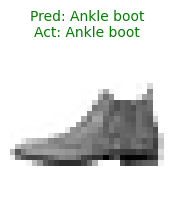

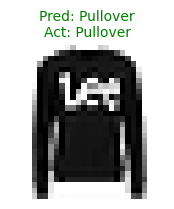

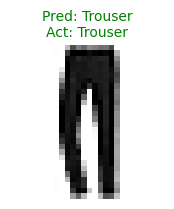

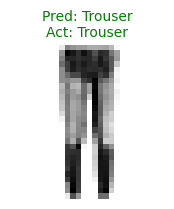

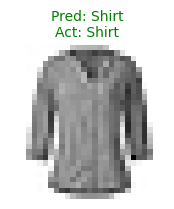

In [ ]:
def predict_with_lr_model(model_pipeline, X_new):
    """
    Makes predictions using the Logistic Regression pipeline.

    Args:
        model_pipeline: The trained sklearn Pipeline object (lr_pipeline).
        X_new: New input data (e.g., flattened image data) for prediction.

    Returns:
        numpy.ndarray: Predicted class labels.
    """
    return model_pipeline.predict(X_new)

# --- Usage Example ---

# Select the first 5 samples from the test set
num_samples_to_predict = 5
test_samples_flat = x_test_flat[:num_samples_to_predict]

# Generate predictions
predictions_lr = predict_with_lr_model(lr_pipeline, test_samples_flat)

print(f"Logistic Regression predictions for the first {num_samples_to_predict} test samples:")
for i, pred in enumerate(predictions_lr):
    print(f"Sample {i+1}: Predicted class ID = {pred} (Label: {class_names[pred]})")

print("\n--- Visual Verification ---")
# Loop through the actual samples to compare
for i, actual in enumerate(y_test[:num_samples_to_predict]):
    predicted_label = class_names[predictions_lr[i]]
    actual_label = class_names[actual]

    # Color logic: Green if correct, Red if wrong
    title_color = 'green' if predicted_label == actual_label else 'red'

    plt.figure(figsize=(2, 2))
    plt.imshow(x_test[i], cmap=plt.cm.binary) # Use the original 2D image for plotting
    plt.title(f"Pred: {predicted_label}\nAct: {actual_label}", color=title_color, fontsize=10)
    plt.axis('off')
    plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Model Performance Comparison:
                 Model  Accuracy  Precision  Recall  F1-Score
0  Logistic Regression    0.8359   0.834673  0.8359  0.835088
1                  ANN    0.8771   0.879164  0.8771  0.876562
2                  CNN    0.8661   0.864797  0.8661  0.864045


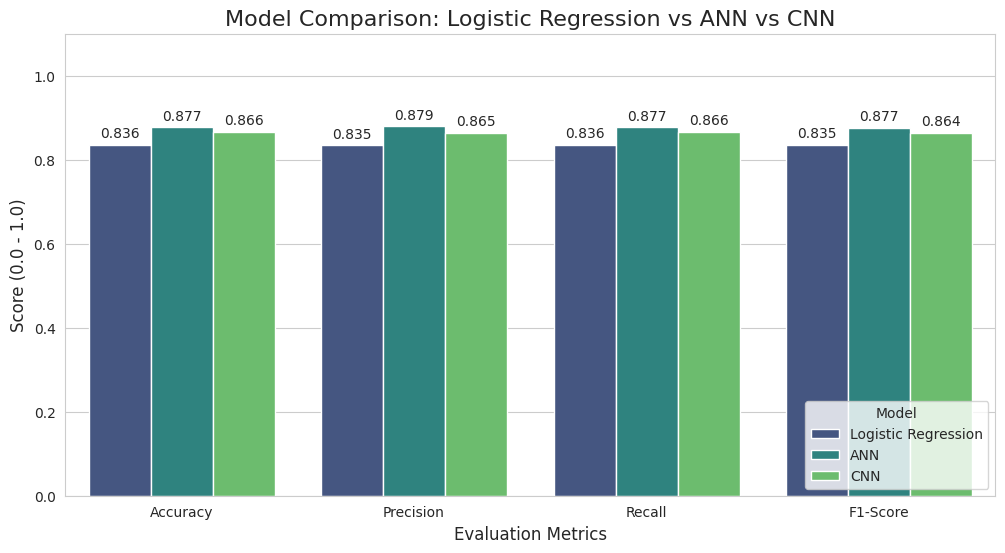

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# --- 1. Gather Results ---
# Assuming you have your trained models and test data:
# lr_model (Logistic Regression Pipeline)
# ann_model (Trained Keras ANN)
# cnn_model (Trained Keras CNN)
# x_test_flat, x_test_cnn, y_test (Data)

# Predictions
y_pred_lr = lr_pipeline.predict(x_test_flat)

y_pred_ann_prob = ann_model.predict(x_test) # Corrected: ANN expects 28x28 input
y_pred_ann = np.argmax(y_pred_ann_prob, axis=1)

y_pred_cnn_prob = cnn_model.predict(x_test_cnn) # Note: CNN uses 3D input
y_pred_cnn = np.argmax(y_pred_cnn_prob, axis=1)

# Helper to calculate metrics dictionary
def get_metrics(y_true, y_pred, name):
    return {
        "Model": name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, average='weighted'),
        "Recall": recall_score(y_true, y_pred, average='weighted'),
        "F1-Score": f1_score(y_true, y_pred, average='weighted')
    }

# Create list of metrics
metrics_data = [
    get_metrics(y_test, y_pred_lr, "Logistic Regression"),
    get_metrics(y_test, y_pred_ann, "ANN"),
    get_metrics(y_test, y_pred_cnn, "CNN")
]

# Convert to DataFrame
df_results = pd.DataFrame(metrics_data)

# Display the table
print("Model Performance Comparison:")
print(df_results)

# --- 2. Plotting the Comparison Graph ---

# Reshape DataFrame for plotting with Seaborn (Melt)
df_melted = df_results.melt(id_vars="Model", var_name="Metric", value_name="Score")

plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Create Grouped Bar Chart
plot = sns.barplot(x="Metric", y="Score", hue="Model", data=df_melted, palette="viridis")

# Customization
plt.title("Model Comparison: Logistic Regression vs ANN vs CNN", fontsize=16)
plt.ylabel("Score (0.0 - 1.0)", fontsize=12)
plt.xlabel("Evaluation Metrics", fontsize=12)
plt.ylim(0, 1.1)  # Set y-axis limit slightly above 1 for labels
plt.legend(title="Model", loc='lower right')

# Add values on top of bars
for container in plot.containers:
    plot.bar_label(container, fmt='%.3f', padding=3, fontsize=10)

plt.show()


--- Generating Grad-CAM Visualizations ---
Targeting layer for Grad-CAM: conv2d_1


/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_29']
Received: inputs=Tensor(shape=(1, 28, 28, 1))
  warnings.warn(msg)
/tmp/ipython-input-1997235351.py:94: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  jet = cm.get_cmap("jet")


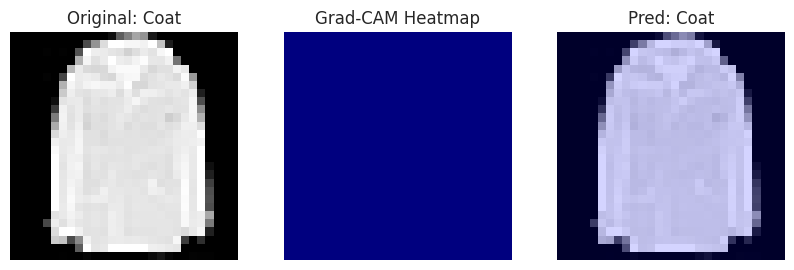

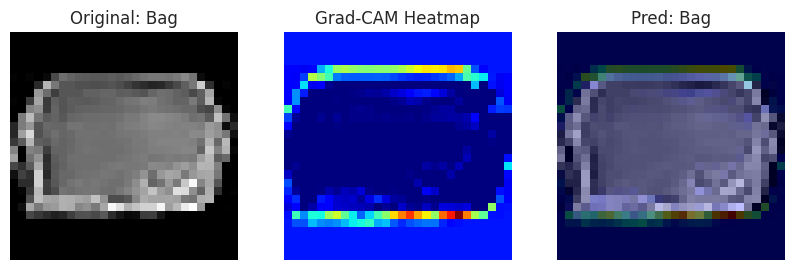

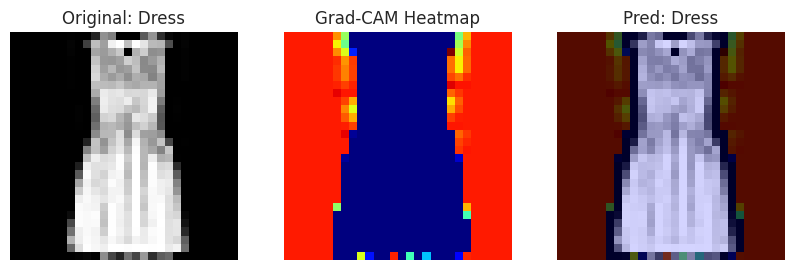

In [ ]:
#crossvalidation

import matplotlib.cm as cm

# ==========================================
# Grad-CAM Implementation for Fashion MNIST
# ==========================================
print("\n--- Generating Grad-CAM Visualizations ---")

def get_last_conv_layer_name(model):
    """
    Search for the last convolutional layer in the model to attach Grad-CAM.
    Since Keras Tuner changes architecture, we find it dynamically.
    """
    for layer in reversed(model.layers):
        if 'conv' in layer.name:
            return layer.name
    raise ValueError("Could not find a convolutional layer in the model.")

def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # Ensure the model is built by making a dummy prediction, if not already built
    if not model.built:
        dummy_input_for_build = tf.zeros(img_array.shape)
        _ = model.predict(dummy_input_for_build, verbose=0)

    # 1. Create a model that maps the input image to the activations of the last conv layer
    feature_extractor = tf.keras.models.Model(
        inputs=model.inputs,
        outputs=model.get_layer(last_conv_layer_name).output
    )

    # 2. Create a classifier model that takes the activations of the last conv layer as input
    #    and outputs the final class predictions. We rebuild the layers after the last conv layer.
    classifier_input = tf.keras.Input(shape=feature_extractor.output.shape[1:])
    x = classifier_input

    found_conv_layer = False
    for layer in model.layers:
        if layer.name == last_conv_layer_name:
            found_conv_layer = True
            continue

        # If we are past the last conv layer, add subsequent layers to the classifier_model
        if found_conv_layer:
            # For simplicity, we assume these layers can be re-called with new inputs
            # or are easily replicable by their config. Direct call is often fine.
            x = layer(x)

    classifier_model = tf.keras.models.Model(inputs=classifier_input, outputs=x)

    # 3. Compute the gradient of the top predicted class for our input image
    #    with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        # Get the activations of the last convolutional layer
        last_conv_layer_output = feature_extractor(img_array)
        # Explicitly watch this tensor for gradients
        tape.watch(last_conv_layer_output)

        # Pass the convolutional features through the classifier part
        preds = classifier_model(last_conv_layer_output)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # 4. Compute gradients of the top predicted class with respect to the activations
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # Handle case where grads might be None
    if grads is None:
        print("Warning: Gradients could not be computed. Returning an empty heatmap.")
        return np.zeros_like(last_conv_layer_output[0, :, :, 0].numpy())

    # 5. Vector of weights: mean intensity of the gradient over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # 6. Multiply each channel in the feature map array by "how important this channel is"
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # 7. For visualization, we normalize the heatmap between 0 & 1
    # Add epsilon for stability in case of division by zero
    heatmap = tf.maximum(heatmap, 0) / (tf.math.reduce_max(heatmap) + tf.keras.backend.epsilon())
    return heatmap.numpy()

def display_gradcam(img, heatmap, actual_label, pred_label, alpha=0.4):
    """
    Superimposes the heatmap onto the original image.
    """
    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Resize the heatmap to match the original image size (28x28)
    jet_heatmap = tf.image.resize(jet_heatmap, (28, 28))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Convert original grayscale image to RGB for plotting overlay
    img_rgb = np.stack((img.squeeze(),)*3, axis=-1)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img_rgb
    superimposed_img = tf.keras.preprocessing.image.array_to_img(superimposed_img)

    # Plotting
    fig, ax = plt.subplots(1, 3, figsize=(10, 4))

    # Original
    ax[0].imshow(img.squeeze(), cmap='gray')
    ax[0].set_title(f"Original: {actual_label}")
    ax[0].axis('off')

    # Heatmap
    ax[1].imshow(heatmap, cmap='jet')
    ax[1].set_title("Grad-CAM Heatmap")
    ax[1].axis('off')

    # Overlay
    ax[2].imshow(superimposed_img)
    ax[2].set_title(f"Pred: {pred_label}")
    ax[2].axis('off')

    plt.show()

# --- Execution ---

# 1. Identify the last Convolutional Layer
last_conv_layer = get_last_conv_layer_name(cnn_model)
print(f"Targeting layer for Grad-CAM: {last_conv_layer}")

# 2. Select a few random test images to visualize
indices = np.random.choice(range(len(x_test_cnn)), 3, replace=False)

# Ensure y_test is the Fashion MNIST test labels, as it might have been overwritten
# by the Wine Quality dataset's y_test (which is a pandas Series).
# Reloading Fashion MNIST test labels to be safe.
(_, _), (_, fashion_mnist_y_test) = keras.datasets.fashion_mnist.load_data()

for i in indices:
    # Prepare image
    img_array = np.expand_dims(x_test_cnn[i], axis=0) # Make it (1, 28, 28, 1)

    # Get Prediction
    preds = cnn_model.predict(img_array, verbose=0)
    pred_index = np.argmax(preds[0])
    pred_label = class_names[pred_index]

    # Use the correct Fashion MNIST y_test for the actual label
    actual_label = class_names[fashion_mnist_y_test[i]]

    # Generate Heatmap
    heatmap = make_gradcam_heatmap(img_array, cnn_model, last_conv_layer)

    # Visualize
    display_gradcam(x_test_cnn[i], heatmap, actual_label, pred_label)

**Part 2**


--- Wine Quality Regression ---
Linear Regression CV R2 Score: 0.3217
MAE: 0.5035
RMSE: 0.6245
R2 Score: 0.4032


  0%|          | 0/320 [00:00<?, ?it/s]

/tmp/ipython-input-3369708199.py:63: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test, feature_names=X.columns)


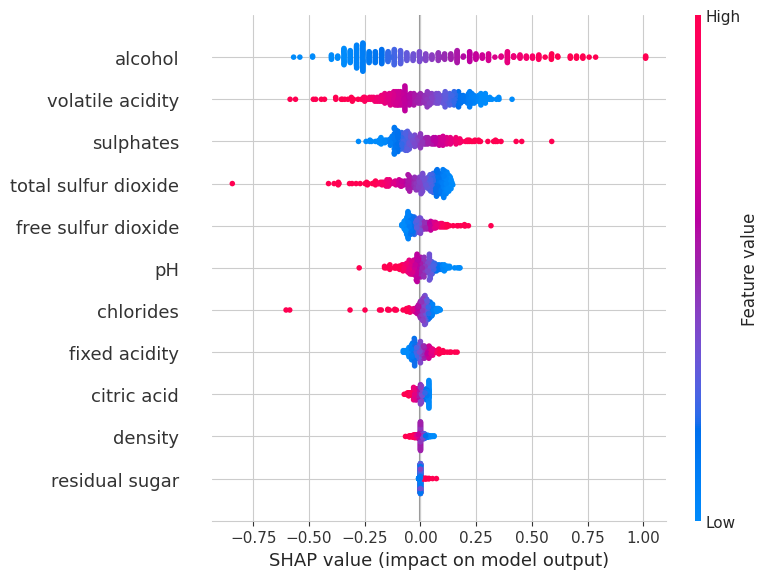

In [ ]:
# ==========================================
# PART 2: Wine Quality Regression
# ==========================================
print("\n--- Wine Quality Regression ---")

# 1. Load Data
import requests
from io import StringIO

url = "https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv"

# Fetch content and replace semicolons with commas for proper parsing
response = requests.get(url)
raw_data = response.text.replace(';', ',')
df = pd.read_csv(StringIO(raw_data))

# Remove quotes from column names (still necessary if they were quoted in the original file)
df.columns = df.columns.str.replace('"', '')

#eda: graphs, charts

# 2. Preprocessing
if df.isnull().sum().sum() > 0:
    df = df.fillna(df.mean())

X = df.drop('quality', axis=1)
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Model Training
lin_reg = LinearRegression()

# Cross Validation
cv_r2 = cross_val_score(lin_reg, X_train_scaled, y_train, cv=5, scoring='r2')
print(f"Linear Regression CV R2 Score: {cv_r2.mean():.4f}")

lin_reg.fit(X_train_scaled, y_train)
y_pred = lin_reg.predict(X_test_scaled)

# 4. Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R2 Score: {r2:.4f}")

# 5. SHAP Explainability
# Summarize background data using k-means for faster computation
X_train_summary = shap.kmeans(X_train_scaled, 25)
explainer = shap.KernelExplainer(lin_reg.predict, X_train_summary)
shap_values = explainer.shap_values(X_test_scaled)

plt.figure()
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

Loading Wine Quality Dataset...
Exploratory Data Analysis...


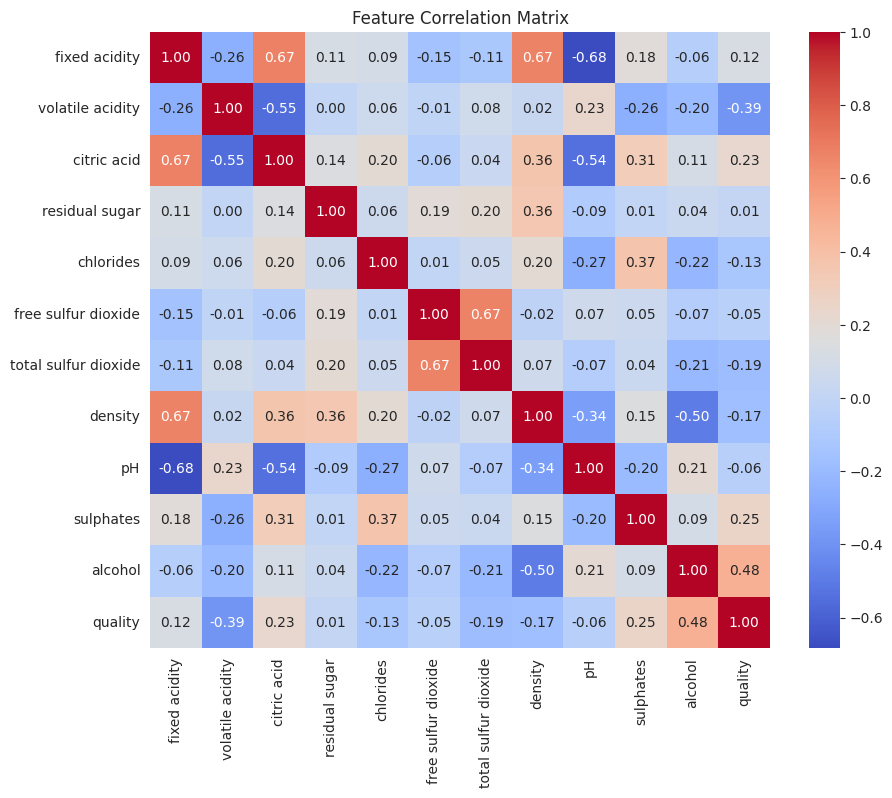

Determining optimal clusters (k)...


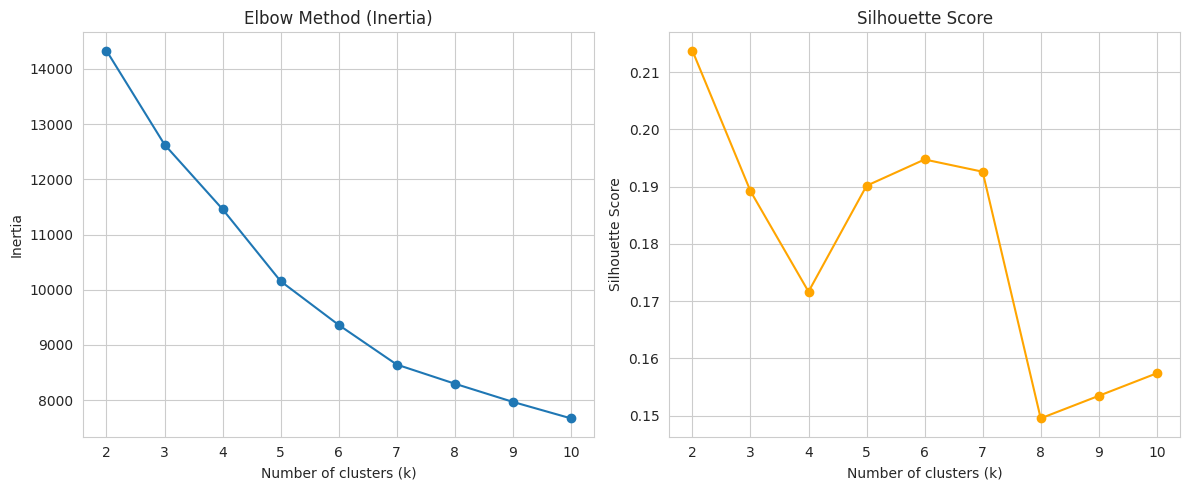

Applying K-Means with k=3...
Final Silhouette Score: 0.1892


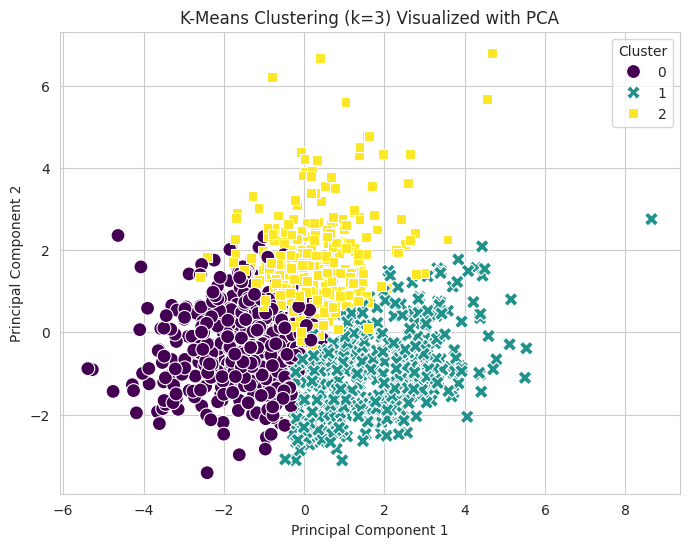


Cluster Means (Feature Averages per Cluster):
         fixed acidity  volatile acidity  citric acid  residual sugar  \
Cluster                                                                 
0             7.189889          0.609342     0.123047        2.214058   
1            10.067131          0.405080     0.469761        2.582570   
2             8.155467          0.535173     0.289680        3.105467   

         chlorides  free sulfur dioxide  total sulfur dioxide   density  \
Cluster                                                                   
0         0.078553            13.507618             34.894737  0.995896   
1         0.100460            10.888446             30.627490  0.997574   
2         0.087235            27.108000             89.954667  0.997276   

               pH  sulphates    alcohol   quality  
Cluster                                            
0        3.405762   0.609224  10.494044  5.552632  
1        3.195040   0.752131  10.724037  5.960159  
2  

/tmp/ipython-input-4131372609.py:108: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=df, palette='Set2')
/tmp/ipython-input-4131372609.py:108: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=df, palette='Set2')
/tmp/ipython-input-4131372609.py:108: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=df, palette='Set2')
/tmp/ipython-input-4131372609.py:108: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assig

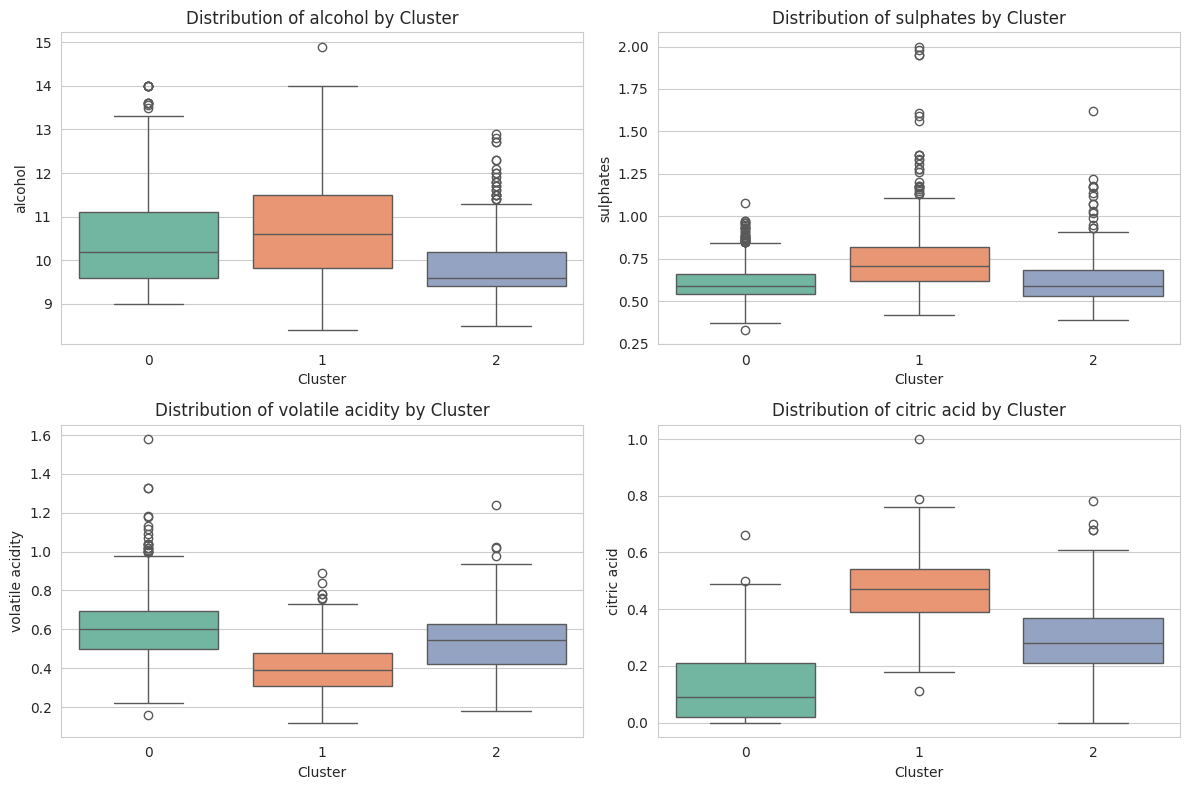

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# 1. Load Data
print("Loading Wine Quality Dataset...")
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep=';')

# 2. Preprocessing
# Check for nulls and impute if necessary
if df.isnull().sum().sum() > 0:
    df = df.fillna(df.mean())

# For clustering, we use the features. The 'quality' column is technically a target,
# but in unsupervised learning, we often drop it or use it only for external validation.
# We will use all features for clustering.
X = df.drop('quality', axis=1)

# Standardization (Critical for K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Exploratory Data Analysis (EDA) for Clustering
print("Exploratory Data Analysis...")
# Correlation Matrix to see feature relationships
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

# 4. K-Means Clustering - Finding Optimal K
print("Determining optimal clusters (k)...")
inertia = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot Elbow Method
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method (Inertia)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')

# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

# 5. Final Clustering with Optimal K
# Based on the plots, k=3 is often a reasonable choice for this dataset,
# but you should verify this visual with the generated plots.
optimal_k = 3
print(f"Applying K-Means with k={optimal_k}...")

kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans_final.fit_predict(X_scaled)

# Add cluster labels to original dataframe for analysis
df['Cluster'] = cluster_labels

# 6. Evaluation & Visualization
print(f"Final Silhouette Score: {silhouette_score(X_scaled, cluster_labels):.4f}")

# Visualize Clusters using PCA (dimensionality reduction to 2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cluster_labels, palette='viridis', style=cluster_labels, s=100)
plt.title(f'K-Means Clustering (k={optimal_k}) Visualized with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

# 7. Cluster Analysis (Insights)
# View mean values of features for each cluster
cluster_summary = df.groupby('Cluster').mean()
print("\nCluster Means (Feature Averages per Cluster):")
print(cluster_summary)

# Visualizing Cluster Differences with Boxplots
# Select a few key features to visualize (e.g., alcohol, acidity)
features_to_plot = ['alcohol', 'sulphates', 'volatile acidity', 'citric acid']

plt.figure(figsize=(12, 8))
for i, feature in enumerate(features_to_plot):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='Cluster', y=feature, data=df, palette='Set2')
    plt.title(f'Distribution of {feature} by Cluster')

plt.tight_layout()
plt.show()